In [88]:
## MACD-Hist Divergence Trading Strategy 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df_original = pd.read_csv('../data/df_ETH-2017-01-01-2018-10-08-FREQ-1h.csv')


print(df_original.columns)



Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignored'],
      dtype='object')


In [89]:
df_original.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignored
0,2017-08-17 04:00:00,301.13,302.57,298.0,301.61,125.66877,2017-08-17 04:59:59,37684.804181,129,80.56377,24193.440789,47039.706757
1,2017-08-17 05:00:00,301.61,303.28,300.0,303.10,377.67246,2017-08-17 05:59:59,114043.282676,202,328.10428,99079.803569,47250.805175
2,2017-08-17 06:00:00,302.40,304.44,301.9,302.68,303.86672,2017-08-17 06:59:59,92034.441294,182,259.28668,78525.948613,47176.444584
3,2017-08-17 07:00:00,302.68,307.96,302.6,307.96,754.74510,2017-08-17 07:59:59,229725.136967,198,592.43176,180297.966961,46884.543391
4,2017-08-17 08:00:00,307.95,309.97,307.0,308.62,150.75029,2017-08-17 08:59:59,46559.462371,182,140.68470,43451.495398,46771.057342


In [91]:
df_original = df_original[['open', 'high', 'low', 'close', 'volume']]

In [92]:
df_original.head()

,open,high,low,close,volume
0,301.13,302.57,298.0,301.61,125.66877
1,301.61,303.28,300.0,303.10,377.67246
2,302.40,304.44,301.9,302.68,303.86672
3,302.68,307.96,302.6,307.96,754.74510
4,307.95,309.97,307.0,308.62,150.75029


In [93]:
## Trying the MACD-hist strategy

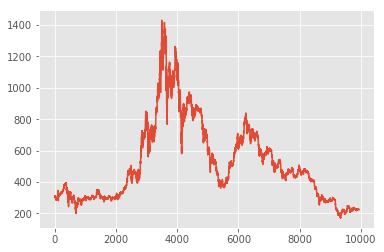

In [94]:
df_original.close.plot()

In [95]:
def EMA(values, window):
    """ Numpy implementation of EMA
    """
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a
    
def MACD(x, nslow=26, nfast=12):
    emaslow = EMA(x, nslow)
    emafast = EMA(x, nfast)
    macd = emafast - emaslow
    signal = EMA(macd, 9)
    hist = macd - signal
    return macd, signal,hist

In [96]:
len(df_original)

9938

In [97]:
df = df_original[100:400]

In [98]:
df.reset_index(drop=True, inplace=True)

In [99]:
len(df)

300

In [102]:
df.head()

,open,high,low,close,volume
0,317.48,324.30,312.75,318.72,21.51000
1,317.86,318.27,314.98,317.29,23.53728
2,317.29,325.30,316.77,321.21,85.34600
3,318.99,333.66,312.60,331.53,76.98358
4,331.33,331.33,325.42,331.30,94.82266


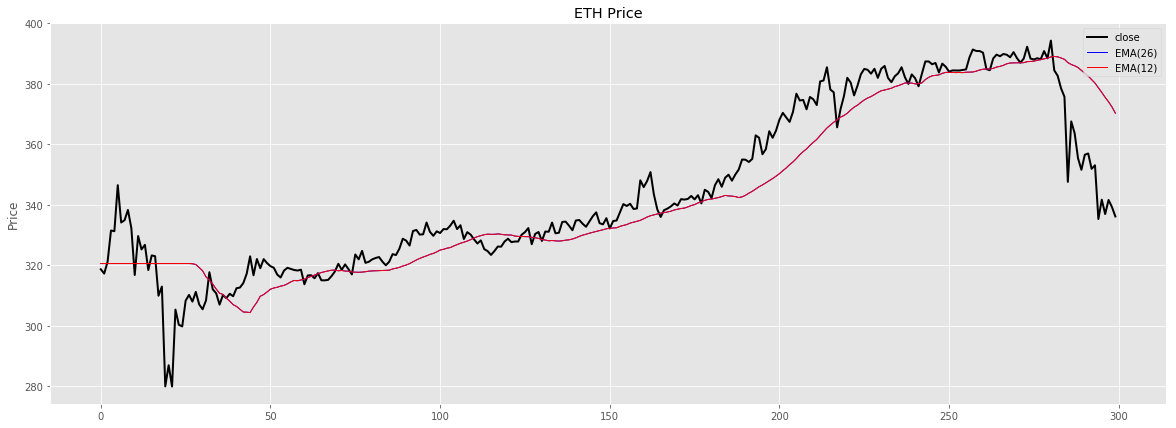

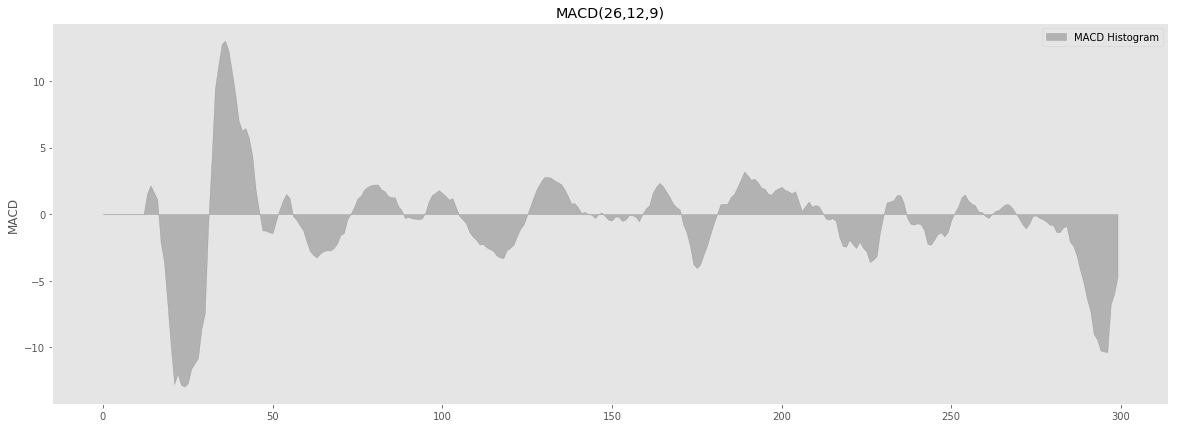

In [103]:

# compute the MACD datapoints
macd, signal,hist = MACD(df['close'])

emaslow = EMA(df['close'], 26)
emafast = EMA(df['close'], 13)


# draw the MACD lines and histogram
f1, ax1 = plt.subplots(figsize=(20,7))
ax1.plot(df.index, df['close'], color = 'black', lw=2, label='close')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(26)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(12)')

f2, ax2 = plt.subplots(figsize=(20,7))
#ax2.plot(df.index, macd, color='green', lw=1,label='MACD Line(26,12)')
#ax2.plot(df.index, signal, color='purple', lw=1, label='Signal Line(9)')

# set other parameters
ax1.legend(loc='upper right')
ax1.set(title = 'ETH Price', ylabel = 'Price')
ax2.fill_between(df.index, hist, color = 'gray', alpha=0.5, label='MACD Histogram')
ax2.set(title = 'MACD(26,12,9)', ylabel='MACD')
ax2.legend(loc = 'upper right')
ax2.grid(False)

plt.show()

In [106]:
len(hist)

300

### MACD-HIST DIVERGENCE STRATEGY

In [110]:
  
##############################################################3

hist = macd_line - signal_line
div = pd.Series([0 for i in range(len(df))])


### Variables:
    # Points crossing the zero line
a = False
ab = False
bc = False
c = False
    # Zones of the MACD-hist Divergence
zone_a = False
zone_b = False
zone_c = False
    # Point for the entry
c_desc = False
c_asc = False
    # Max and Min of the zones
min_a = 0
min_c = 0
max_b = 0

list_max_min = []

########################################### FUNCTION

for i in range(len(df)):
    
    if hist[i]<0:
        if zone_b:
            list_max_min.append(['b', max_b])
            print('--------------------------------')
            print('Zone B, maximum at: ', max_b)
            
                        
        max_b = 0
        b = False
        zone_b = False
        a = True
        zone_a = True
        if hist[i]< min_a:
            min_a = hist[i]
        else:
            if len(list_max_min)<3:
                print('List too short')
                pass
            else:
                print(list_max_min[len(list_max_min)-3][0])
                if ((list_max_min[len(list_max_min)-3][0]) == 'b'):
                    print('The Same')
                    print('Anterior Valor: ', list_max_min[len(list_max_min)-3][1])
                    print('Actual Valor: ', list_max_min[len(list_max_min)-1][1])
                    if (list_max_min[len(list_max_min)-3][1]>list_max_min[len(list_max_min)-1][1]):
                        print('Possible Bearish Divergence on the MACD-hist ###################################')
                        #print 'Possible Bearish Divergence on the MACD-hist ###################################')
                        ax1.axvline(x=i, color = 'r')
                        ax2.axvline(x=i, color = 'r')
            
    
    if hist[i]>0:
        if zone_a:
            list_max_min.append(['a', min_a])
            print('--------------------------------')
            print('Zone A, minimun at: ', min_a)
            
                        
        min_a = 0
        b = True
        zone_b = True
        zone_a = False
        a = False
        if hist[i]> max_b:
            max_b = hist[i]
        elif (hist[i]< max_b):
            if len(list_max_min)<3:
                print('List too short')
                pass
            else:
                print(list_max_min[len(list_max_min)-3][0])
                if ((list_max_min[len(list_max_min)-3][0]) == 'a'):
                    print('The Same')
                    print('Anterior Valor: ', list_max_min[len(list_max_min)-3][1])
                    print('Actual Valor: ', list_max_min[len(list_max_min)-1][1])
                    if (list_max_min[len(list_max_min)-3][1])<(list_max_min[len(list_max_min)-1][1]):
                        print('Possible Bullish Divergence on the MACD-hist ###################################')
                        #print 'Possible Bullish Divergence on the MACD-hist ###################################')
                        ax1.axvline(x=i, color = 'g')
                        ax2.axvline(x=i, color = 'g')

List too short
List too short
List too short
List too short
List too short
List too short
List too short
List too short
--------------------------------
Zone B, maximum at:  0.9229534392199483
List too short
List too short
List too short
List too short
List too short
List too short
List too short
--------------------------------
Zone A, minimun at:  -1.0615884475656094
List too short
List too short
--------------------------------
Zone B, maximum at:  0.5364088738890369
b
The Same
Anterior Valor:  0.9229534392199483
Actual Valor:  0.5364088738890369
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.9229534392199483
Actual Valor:  0.5364088738890369
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.9229534392199483
Actual Valor:  0.5364088738890369
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.922953439

b
The Same
Anterior Valor:  0.790550083782422
Actual Valor:  0.07381092152549806
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.790550083782422
Actual Valor:  0.07381092152549806
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.790550083782422
Actual Valor:  0.07381092152549806
Possible Bearish Divergence on the MACD-hist ###################################
b
The Same
Anterior Valor:  0.790550083782422
Actual Valor:  0.07381092152549806
Possible Bearish Divergence on the MACD-hist ###################################
--------------------------------
Zone A, minimun at:  -1.264484966066728
a
The Same
Anterior Valor:  -0.03841920246374686
Actual Valor:  -1.264484966066728
a
The Same
Anterior Valor:  -0.03841920246374686
Actual Valor:  -1.264484966066728
a
The Same
Anterior Valor:  -0.03841920246374686
Actual Valor:  -1.264484966066728
a
The Same
Anterior Valor:  -0